In [6]:
import pandas as pd

transaction_data_path = r"C:\Users\yusuf\Desktop\Ola\Forage\QVI_transaction_data.xlsx"
customer_data_path = r"C:\Users\yusuf\Desktop\Ola\Forage\QVI_purchase_behaviour.csv"
transaction_data = pd.read_excel(transaction_data_path)
customer_data = pd.read_csv(customer_data_path)
print(transaction_data.head())
print(customer_data.head())


    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004  

In [8]:
print("Missing values in transaction data:") # Checking for missinf value
print(transaction_data.isnull().sum()) 

print("\nData types in transaction data:")
print(transaction_data.dtypes)

print("\nMissing values in customer data:")
print(customer_data.isnull().sum())

print("\nData types in customer data:")
print(customer_data.dtypes)


Missing values in transaction data:
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

Data types in transaction data:
DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

Missing values in customer data:
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Data types in customer data:
LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object


In [10]:
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], origin='1899-12-30') # Data and column conversion

print("\nUpdated Data types in transaction data:")
print(transaction_data.dtypes)

print("\nSummary statistics of numeric columns:")
print(transaction_data.describe())



Updated Data types in transaction data:
DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

Summary statistics of numeric columns:
                                DATE     STORE_NBR  LYLTY_CARD_NBR  \
count                         264836  264836.00000    2.648360e+05   
mean   1899-12-30 00:00:00.000043008     135.08011    1.355495e+05   
min    1899-12-30 00:00:00.000043282       1.00000    1.000000e+03   
25%    1899-12-30 00:00:00.000043264      70.00000    7.002100e+04   
50%    1899-12-30 00:00:00.000043520     130.00000    1.303575e+05   
75%    1899-12-30 00:00:00.000043520     203.00000    2.030942e+05   
max    1899-12-30 00:00:00.000043646     272.00000    2.373711e+06   
std                              NaN      76.78418    8.057998e+04   

          

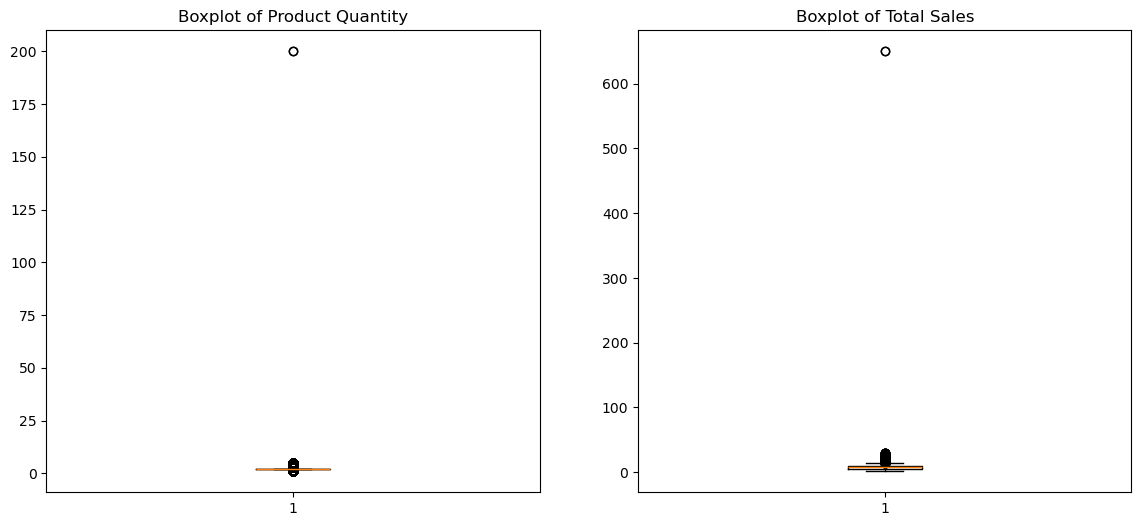

In [34]:
import matplotlib.pyplot as plt

# Boxplot visualization for prduct qtty and total sales
plt.figure(figsize=(14, 6))

# product qunatity boxplot
plt.subplot(1, 2, 1)
plt.boxplot(transaction_data['PROD_QTY'])
plt.title('Boxplot of Product Quantity')

plt.savefig('boxplot_product_quantity.png')

# total sales boxplot
plt.subplot(1, 2, 2)
plt.boxplot(transaction_data['TOT_SALES'])
plt.title('Boxplot of Total Sales')

plt.savefig('boxplot_total_sales.png')

# Display the plots
plt.show()


In [14]:
# Summary of Findings:

# 1. Product Quantity (PROD_QTY):

# In one transaction, the amount of chips purchased was 200 units. This is uncommon in a normal supermarket where such transactions might imply bulk purchasing or a mistake in data entry.

# 2. Total Sales (TOT_SALES):

# Moreover, some sales amounts hit $650. This is much greater than an average sale and could correlate to equivalent large-scale purchases.

# Define reasonable thresholds for identifying outliers
max_prod_qty = 10  # Assume 10 units as the upper limit for normal purchases
max_tot_sales = 100  # Assume $100 as the upper limit for normal sales

# Removing the transactions that exceed these thresholds
cleaned_transaction_data = transaction_data[(transaction_data['PROD_QTY'] <= max_prod_qty) & (transaction_data['TOT_SALES'] <= max_tot_sales)]

# data set verification post cleaning
print("Data after removing outliers:")
print(cleaned_transaction_data.describe())

Reasons for chosing the threshold

PROD_QTY Threshold: 10 Units

Reasoning:

General Purchase Behavior: In a typical retail setting, most of the clients are less likely to buy beyond 10 units of chips at one go. A higher quantity may indicate a bulk purchase (e.g., for an event or a business) which does not represent the everyday consumer behavior that this analysis is focused on.

Outlier detection: Having set this as the threshold, it helps identify those purchases that do not conform to the normal client population and hence could distort this study towards behavior that is unrelated for planning.

TOT_SALES Threshold: $100

Reasoning:

Expected Sales Range: The price range for a single packet of chips usually lies within $2-$7 bracket. This implies therefore, any transaction beyond $100 would indicate either a purchase of many items or accuracy issues with data like duplication.

Relevance to Analysis: The research is meant to analyze ordinary consumer behavior as opposed to bulk buying and other exceptional cases. By having a threshold of about $100 in place we are focusing on transactions that most likely represent individual or household consumption patterns, which are more relevant to the goals that our clients hin terms such as i

In [22]:
# # data merging.
merged_data = pd.merge(cleaned_transaction_data, customer_data, on="LYLTY_CARD_NBR", how="inner") #This is cleaned data with customer data on LYLTY_CARD_NBR


print(merged_data.head()) # first rows display for verification

                           DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 1899-12-30 00:00:00.000043390          1            1000       1         5   
1 1899-12-30 00:00:00.000043599          1            1307     348        66   
2 1899-12-30 00:00:00.000043414          1            1307     346        96   
3 1899-12-30 00:00:00.000043533          1            1307     347        54   
4 1899-12-30 00:00:00.000043605          1            1343     383        61   

                                PROD_NAME  PROD_QTY  TOT_SALES  \
0  Natural Chip        Compny SeaSalt175g         2        6.0   
1                CCs Nacho Cheese    175g         3        6.3   
2          WW Original Stacked Chips 160g         2        3.8   
3                       CCs Original 175g         1        2.1   
4  Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   

                LIFESTAGE PREMIUM_CUSTOMER  
0   YOUNG SINGLES/COUPLES          Premium  
1  MIDAGE SINGLES/COUPLES       

In [24]:
# total sales by LIFESTAGE and PREMIUM_CUSTOMER
sales_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# average transaction size by LIFESTAGE and PREMIUM_CUSTOMER
avg_transaction_size = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].mean().reset_index()

# top-selling products
top_selling_products = merged_data.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=False).reset_index()

# Display the results
print("Total Sales by Segment:\n", sales_by_segment)
print("\nAverage Transaction Size by Segment:\n", avg_transaction_size)
print("\nTop-Selling Products:\n", top_selling_products.head(10))


Total Sales by Segment:
                  LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
0   MIDAGE SINGLES/COUPLES           Budget   35514.80
1   MIDAGE SINGLES/COUPLES       Mainstream   90803.85
2   MIDAGE SINGLES/COUPLES          Premium   58432.65
3             NEW FAMILIES           Budget   21928.45
4             NEW FAMILIES       Mainstream   17013.90
5             NEW FAMILIES          Premium   11491.10
6           OLDER FAMILIES           Budget  168363.25
7           OLDER FAMILIES       Mainstream  103445.55
8           OLDER FAMILIES          Premium   80658.40
9    OLDER SINGLES/COUPLES           Budget  136769.80
10   OLDER SINGLES/COUPLES       Mainstream  133393.80
11   OLDER SINGLES/COUPLES          Premium  132263.15
12                RETIREES           Budget  113147.80
13                RETIREES       Mainstream  155677.05
14                RETIREES          Premium   97646.05
15          YOUNG FAMILIES           Budget  139345.85
16          YOUNG FAMILIES       Mainstr

Findings of the Analysis
1. Total Sales by Customer Segment:

Top Segments by Sales :
Bhe “BDGET” segment has got highest sales with “OLDER FAMILIES” being its top contributors totaling to $168,363.25.

Also, there are substantial contributions from “YOUNG SINGLES/COUPLES” within the Mainstream category. This group records a total sales amounting to $157,621.60.

Additionally, MAINSTREAM Retirees have an outstanding sale of $155,677.05 to register.

2. Average Transaction Size by Customer Segment:
Transaction Size Consistency:

The average transaction sizes are quite consistent across segments and typically hovers around $7/$7.5 in general terms.

In both BUDGET and PREMIUM Market segments Young singles couples’ have slightly lesser average transaction size at about $6.62 on average transactions per customer.
3. Top-Selling Products:

Most Popular Products:

The to selling product is "Dorito orn Chp Supreme 380g" with total sales of aboed$39,052.00

Folowing very close are “Smiths Crnkle  ip Ognl Big Bag 380g” and “Smiths Crinkle Chps Salt & Vinegar 330g”,$34k  four thousand dollars in stock value .

<Figure size 1200x800 with 0 Axes>

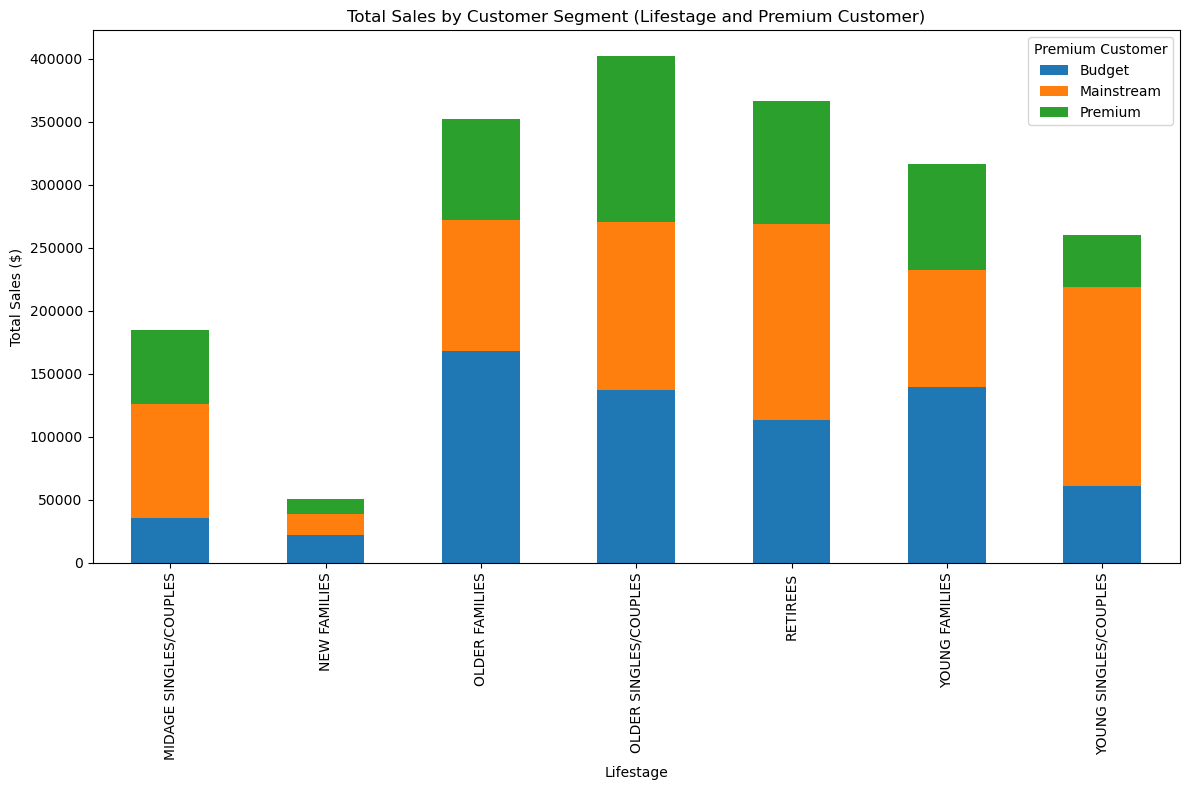

<Figure size 1200x800 with 0 Axes>

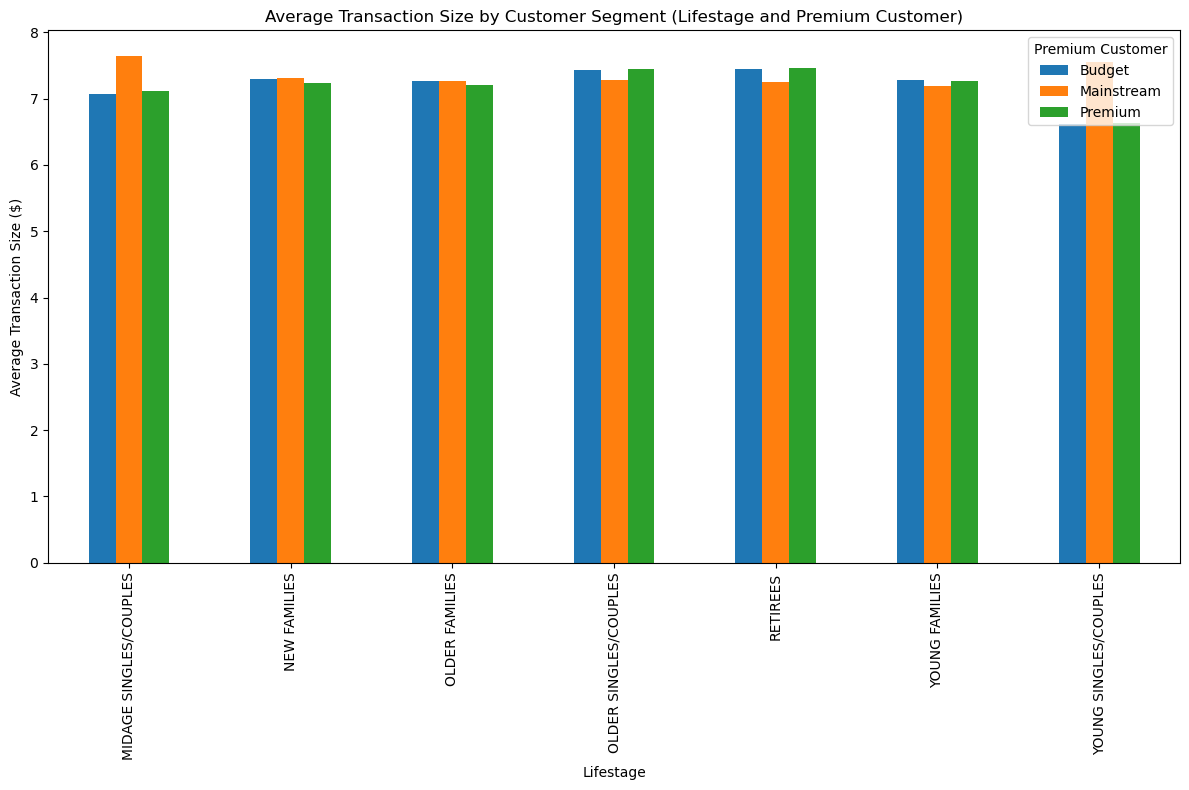

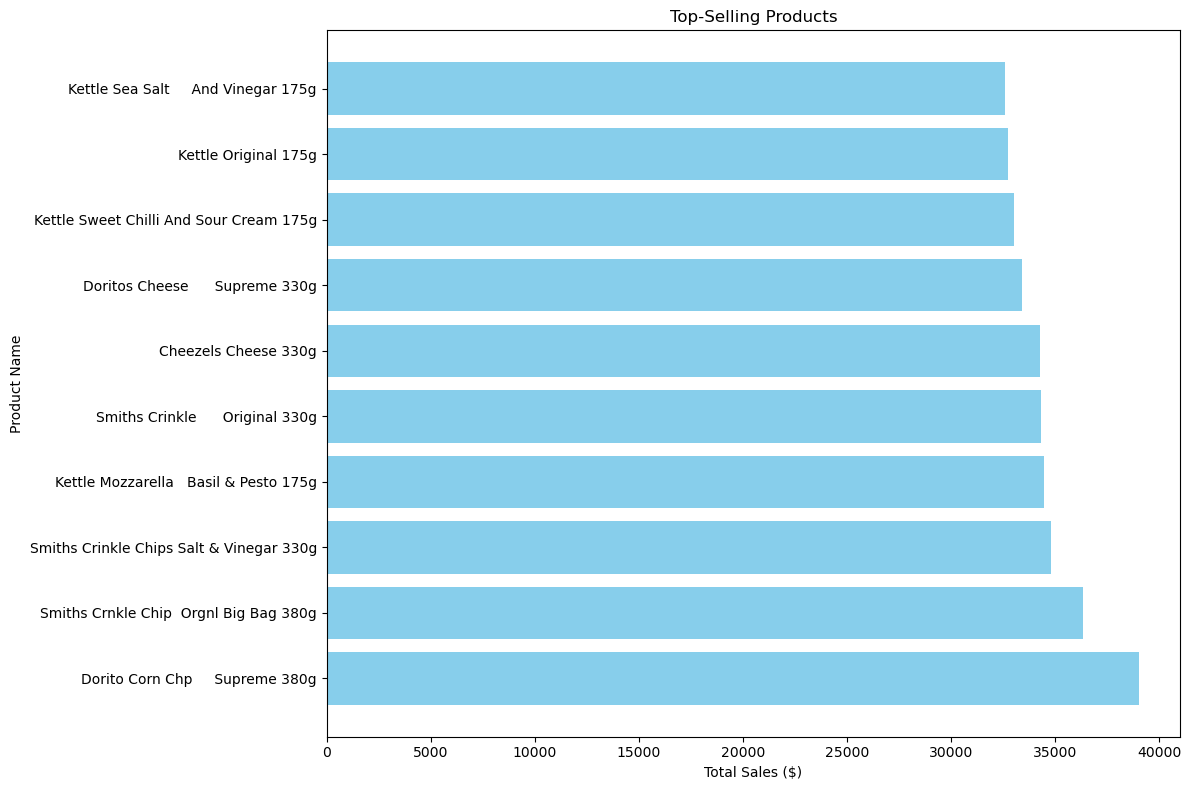

In [29]:
import matplotlib.pyplot as plt

# Visualization: Total Sales by Customer Segment (Lifestage and Premium Customer)
plt.figure(figsize=(12, 8))
sales_by_segment_pivot = sales_by_segment.pivot(index="LIFESTAGE", columns="PREMIUM_CUSTOMER", values="TOT_SALES")
sales_by_segment_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title("Total Sales by Customer Segment (Lifestage and Premium Customer)")
plt.xlabel("Lifestage")
plt.ylabel("Total Sales ($)")
plt.legend(title="Premium Customer")
plt.tight_layout()
plt.savefig('total_sales_by_segment.png')  # Save the figure as a PNG file
plt.show()

# Visualization: Average Transaction Size by Customer Segment (Lifestage and Premium Customer)
plt.figure(figsize=(12, 8))
avg_transaction_size_pivot = avg_transaction_size.pivot(index="LIFESTAGE", columns="PREMIUM_CUSTOMER", values="TOT_SALES")
avg_transaction_size_pivot.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title("Average Transaction Size by Customer Segment (Lifestage and Premium Customer)")
plt.xlabel("Lifestage")
plt.ylabel("Average Transaction Size ($)")
plt.legend(title="Premium Customer")
plt.tight_layout()
plt.savefig('avg_transaction_size_by_segment.png')  # Save the figure as a PNG file
plt.show()

# Visualization: Top-Selling Products
plt.figure(figsize=(12, 8))
plt.barh(top_selling_products['PROD_NAME'].head(10), top_selling_products['TOT_SALES'].head(10), color='skyblue')
plt.title("Top-Selling Products")
plt.xlabel("Total Sales ($)")
plt.ylabel("Product Name")
plt.tight_layout()
plt.savefig('top_selling_products.png')  # Save the figure as a PNG file
plt.show()
